In [69]:
import birankpy
from birank_bias_regularization import *
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.sparse as spa
from networkx.algorithms import bipartite

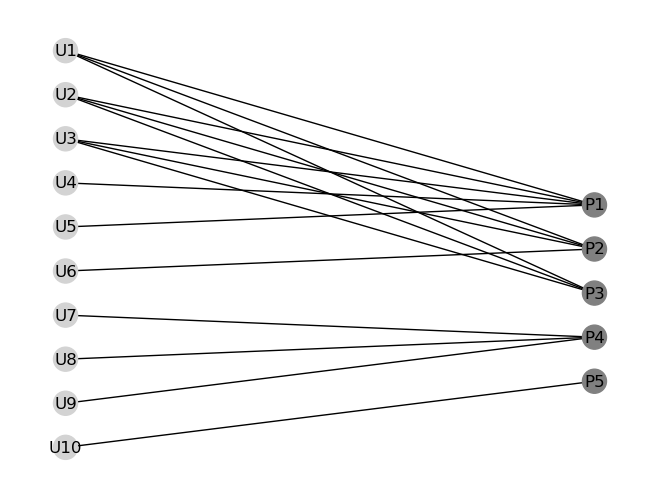

In [42]:
# Define the sets of users and products
users = ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10']
products = ['P1', 'P2', 'P3', 'P4', 'P5']

# Define the edges between users and products
edges = [
    ('U1', 'P1'), ('U2', 'P1'), ('U3', 'P1'), ('U4', 'P1'), ('U5', 'P1'), # Reviews for P1
    ('U1', 'P2'), ('U2', 'P2'), ('U3', 'P2'), ('U6', 'P2'),  # Reviews for P2
    ('U1', 'P3'), ('U2', 'P3'), ('U3', 'P3'),  # Reviews for P3
    ('U7', 'P4'), ('U8', 'P4'),  ('U9', 'P4'), # Reviews for P4
    ('U10', 'P5')  # Reviews for P5
]

# Create a bipartite graph
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(users, bipartite=0)  # 0 to indicate one set of nodes
B.add_nodes_from(products, bipartite=1)  # 1 to indicate the other set
# Add edges only between nodes of opposite sets
B.add_edges_from(edges)

# Generate a layout for our nodes 
pos = {}
# Update position for user nodes (inverted index for users to place U1 at the top)
pos.update((node, (1, len(users) - index)) for index, node in enumerate(users))
# Update position for product nodes (centered vertically)
pos.update((node, (2, len(products) - 1 - index + (len(users) - len(products))/2 )) for index, node in enumerate(products))

# Draw the bipartite graph
nx.draw(B, pos, with_labels=True, node_color=['lightgrey' if node in users else 'grey' for node in B])
plt.show()

In [83]:
# Create an empty adjacency matrix
adj_matrix = spa.dok_matrix((len(users), len(products)), dtype=np.int8)

# Populate the adjacency matrix based on the edges
for edge in edges:
    u_idx = users.index(edge[0])
    p_idx = products.index(edge[1])
    adj_matrix[u_idx, p_idx] = 1  # Assuming all reviews are weighted equally

# Convert to a CSR (Compressed Sparse Row) matrix
adj_matrix_csr = adj_matrix.tocsr()

In [53]:
# Run the BiRank algorithm
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs
user_scores, product_scores = birankpy.birank(adj_matrix_csr, normalizer='HITS',alpha=0.85, beta=0.85, max_iter=20, tol=1e-4)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U1', 'U2', 'U3', 'U4', 'U5']
Top ranked products: ['P1', 'P2', 'P3', 'P4', 'P5']


In [54]:
# Run the BiRank algorithm with bias correction
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs

# Calculate the degree of each user node
user_activity = {node: B.degree(node) for node in users}

# Convert user_activity dictionary values to a numpy array
user_activity_array = np.array([user_activity[node] for node in users])

# Run the BiRank algorithm with bias correction
user_scores, product_scores = birank_with_regularization(
    adj_matrix_csr, 
    user_activity_array, 
    normalizer='HITS', 
    alpha=0.85, 
    beta=0.85, 
    max_iter=20, 
    tol=1e-4
)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U4', 'U5', 'U6', 'U1', 'U2']
Top ranked products: ['P1', 'P2', 'P3', 'P4', 'P5']


In [55]:
# Run the BiRank algorithm
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs
user_scores, product_scores = birankpy.birank(adj_matrix_csr, normalizer='CoHITS',alpha=0.85, beta=0.85, max_iter=20, tol=1e-4)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U10', 'U1', 'U2', 'U3', 'U7']
Top ranked products: ['P1', 'P4', 'P2', 'P5', 'P3']


In [56]:
# Run the BiRank algorithm with bias correction
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs

# Calculate the degree of each user node
user_activity = {node: B.degree(node) for node in users}

# Convert user_activity dictionary values to a numpy array
user_activity_array = np.array([user_activity[node] for node in users])

# Run the BiRank algorithm with bias correction
user_scores, product_scores = birank_with_regularization(
    adj_matrix_csr, 
    user_activity_array, 
    normalizer='CoHITS', 
    alpha=0.85, 
    beta=0.85, 
    max_iter=20, 
    tol=1e-4
)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U10', 'U7', 'U8', 'U9', 'U6']
Top ranked products: ['P1', 'P4', 'P2', 'P5', 'P3']


In [57]:
# Run the BiRank algorithm
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs
user_scores, product_scores = birankpy.birank(adj_matrix_csr, normalizer='BGRM',alpha=0.85, beta=0.85, max_iter=20, tol=1e-4)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U10', 'U7', 'U8', 'U9', 'U1']
Top ranked products: ['P5', 'P4', 'P1', 'P2', 'P3']


In [58]:
# Run the BiRank algorithm with bias correction
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs

# Calculate the degree of each user node
user_activity = {node: B.degree(node) for node in users}

# Convert user_activity dictionary values to a numpy array
user_activity_array = np.array([user_activity[node] for node in users])

# Run the BiRank algorithm with bias correction
user_scores, product_scores = birank_with_regularization(
    adj_matrix_csr, 
    user_activity_array, 
    normalizer='BGRM', 
    alpha=0.85, 
    beta=0.85, 
    max_iter=20, 
    tol=1e-4
)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U10', 'U7', 'U8', 'U9', 'U6']
Top ranked products: ['P5', 'P4', 'P1', 'P2', 'P3']


In [82]:
# Run the BiRank algorithm
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs
user_scores, product_scores = birankpy.birank(adj_matrix_csr, normalizer='BiRank',alpha=0.85, beta=0.85, max_iter=20, tol=1e-4)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

NotImplementedError: adding a nonzero scalar to a sparse matrix is not supported

In [63]:
# Run the BiRank algorithm with bias correction
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs

# Calculate the degree of each user node
user_activity = {node: B.degree(node) for node in users}

# Convert user_activity dictionary values to a numpy array
user_activity_array = np.array([user_activity[node] for node in users])

# Run the BiRank algorithm with bias correction
user_scores, product_scores = birank_with_regularization(
    adj_matrix_csr, 
    user_activity_array, 
    normalizer='BiRank',
    gamma =0.1,
    alpha=0.85, 
    beta=0.85, 
    max_iter=20, 
    tol=1e-4
)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U10', 'U7', 'U8', 'U9', 'U6']
Top ranked products: ['P1', 'P4', 'P2', 'P5', 'P3']


### Synthetic Random Graphs

In our analysis, we first explore the Random Graph model, which parallels the concepts of the Erdős–Rényi approach in network theory. This model is applied to a bipartite graph structure, encompassing two distinct sets – such as users and products – where connections between these sets are formed randomly. Each potential link between a user and a product is established based on a fixed probability, independent of other connections. This randomness in edge formation makes the Random Graph model particularly useful for simulating and understanding networks where interactions are unstructured and follow no predictable pattern. It's a fundamental model for studying the properties of networks in their simplest form, devoid of any preferential biases or structured connectivity patterns.

In [98]:
def generate_random_bipartite_graph(num_users, num_products, density=0.1):
    B = nx.Graph()
    users = ['U{}'.format(i) for i in range(num_users)]
    products = ['P{}'.format(i) for i in range(num_products)]
    B.add_nodes_from(users, bipartite=0)
    B.add_nodes_from(products, bipartite=1)

    for user in users:
        for product in products:
            if np.random.rand() <= density:
                B.add_edge(user, product)

    return B, users, products

# Example usage
B_random, users, products = generate_random_bipartite_graph(100, 50, density=0.05)

### Synthetic Power-Law Graphs

In contrast, the Power-Law Graph model, which we also employ, is inspired by the Barabási–Albert framework and is adapted to fit the bipartite nature of our network. This model is characterized by the formation of hubs – nodes that have significantly more connections than others, following a power-law distribution. Such a pattern is reflective of a 'rich-get-richer' dynamic, commonly seen in various real-world systems. In the context of our bipartite graphs, this translates to certain users or products becoming highly connected, signifying their dominant role or popularity in the network. The Power-Law Graph model is thus instrumental in understanding and analyzing networks where certain nodes play a pivotal role, influencing the network's structure and dynamics significantly.

In [67]:
def generate_power_law_bipartite_graph(num_users, num_products, exponent=2.5):
    while True:
        user_degrees = np.random.zipf(a=exponent, size=num_users)
        product_degrees = np.random.zipf(a=exponent, size=num_products)

        if sum(user_degrees) == sum(product_degrees):
            break

    B = nx.bipartite.configuration_model(user_degrees, product_degrees)
    B = nx.Graph(B)  # Convert to a simple graph (remove parallel edges and self loops)
    B.remove_edges_from(nx.selfloop_edges(B))

    return B

# Example usage
B_power_law = generate_power_law_bipartite_graph(100, 50, exponent=2.5)

### Synthetic Stochastic Block Model

The Stochastic Block Model (SBM) for bipartite graphs is a versatile and realistic approach to modeling networks with inherent community structures. In this model, the graph is divided into distinct blocks or groups, each representing a set of nodes (such as users or products). The connections between nodes are then established based on probabilities that are defined for each pair of blocks. Within this framework, nodes are more likely to form connections within their own group compared to nodes in other groups. This characteristic makes the SBM particularly useful in emulating real-world scenarios where distinct communities or groups interact more frequently among themselves than with others, such as in social networks or user-item interactions. By adjusting the sizes of these blocks and the inter- and intra-block connection probabilities, the SBM can be tailored to capture the complex and clustered connectivity patterns often observed in natural and social systems.

In [75]:
def generate_sbm_bipartite_graph(sizes, p_matrix):
    """
    Generate a bipartite graph using the Stochastic Block Model.

    :param sizes: List of sizes of each block. Length of the list represents the number of blocks.
    :param p_matrix: Probability matrix for edge creation between blocks.
    :return: A bipartite graph generated using SBM.
    """
    # Create a Stochastic Block Model graph
    G = nx.stochastic_block_model(sizes, p_matrix)

    # Assign the 'bipartite' attribute
    for node in range(sizes[0]):
        G.nodes[node]['bipartite'] = 0  # First set (e.g., users)
    for node in range(sizes[0], sum(sizes)):
        G.nodes[node]['bipartite'] = 1  # Second set (e.g., products)

    return G

# Example usage
# Define sizes of the two blocks (e.g., users and products)
block_sizes = [50, 50]  # 50 users and 50 products

# Define the probability matrix for connections within and between blocks
probability_matrix = [
    [0.05, 0.02],  # Probability of connections within users and between users and products
    [0.02, 0.05]   # Probability of connections between products and users and within products
]

# Generate the graph
G_sbm = generate_sbm_bipartite_graph(block_sizes, probability_matrix)

### Plot

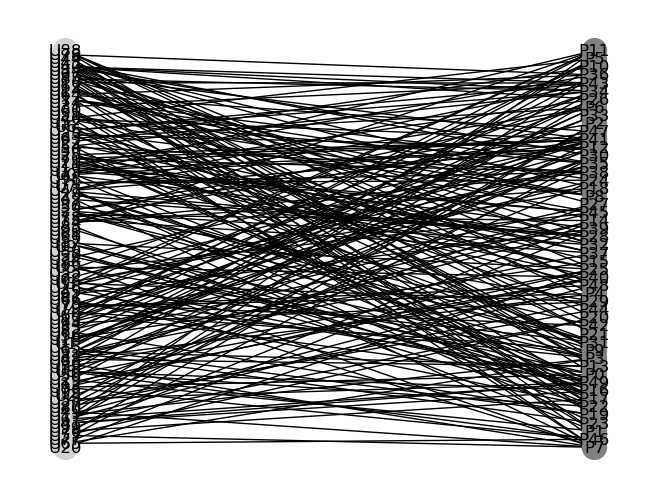

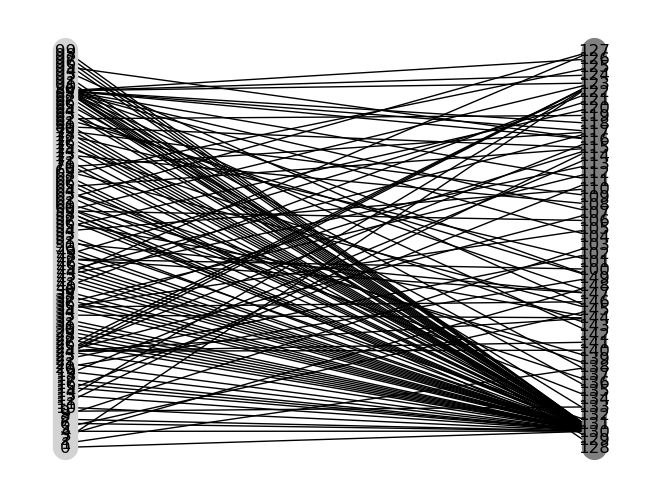

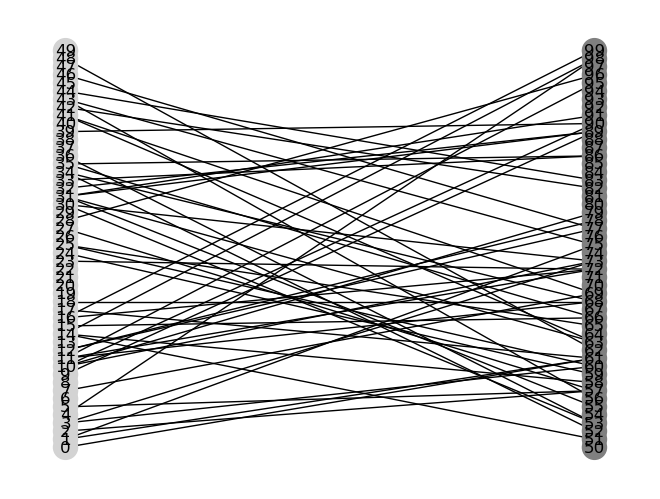

In [76]:
def plot_bipartite_graph(B):
    # Separate by nodes
    top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
    bottom_nodes = set(B) - top_nodes

    # Create layout
    pos = nx.bipartite_layout(B, top_nodes)
    nx.draw(B, pos, with_labels=True, node_color=['lightgrey' if n in top_nodes else 'grey' for n in B])
    plt.show()

# Plot the random graph
plot_bipartite_graph(B_random)

# Plot the power-law graph
plot_bipartite_graph(B_power_law)

# Plot the sbm_bipartite_graph
plot_bipartite_graph(G_sbm)

### Ranking

In [107]:
adj_matrix = nx.adjacency_matrix(B_random)
adj_matrix_csr = adj_matrix.tocsr()

In [105]:
# Run the BiRank algorithm
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs
user_scores, product_scores = birankpy.birank(adj_matrix_csr, normalizer='BiRank',alpha=0.85, beta=0.85, max_iter=20, tol=1e-4)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])

Top ranked users: ['U10', 'U1', 'U2', 'U3', 'U9']
Top ranked products: ['P1', 'P4', 'P2', 'P5', 'P3']


In [ ]:
# Run the BiRank algorithm with bias correction
# You may need to adjust the parameters like alpha, beta, max_iter based on your specific needs

# Calculate the degree of each user node
user_activity = {node: B_random.degree(node) for node in users}

# Convert user_activity dictionary values to a numpy array
user_activity_array = np.array([user_activity[node] for node in users])

# Run the BiRank algorithm with bias correction
user_scores, product_scores = birank_with_regularization(
    adj_matrix_csr, 
    user_activity_array, 
    normalizer='BiRank',
    gamma =0.1,
    alpha=0.85, 
    beta=0.85, 
    max_iter=20, 
    tol=1e-4
)

# user_scores and product_scores are numpy arrays containing the ranking scores of users and products, respectively
user_ranking = np.argsort(-user_scores)  # - for descending order
product_ranking = np.argsort(-product_scores)

# Print top ranked users and products
print("Top ranked users:", [users[i] for i in user_ranking[:5]])  # adjust the slice as needed
print("Top ranked products:", [products[i] for i in product_ranking[:5]])